### Differential Evolution

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной   
эволюции: strategy, popsize, tol, mutation, recombination и updating.

In [1]:
import numpy as np
import random
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
from PIL import Image

#### Ackley's function

${\displaystyle f(x,y)=-20\exp \left[-0.2{\sqrt {0.5\left(x^{2}+y^{2}\right)}}\right]}
−exp[0.5(cos2πx+cos2πy)]+e+20{\displaystyle -\exp \left[0.5\left(\cos 2\pi x+\cos 2\pi y\right)\right]+e+20}$

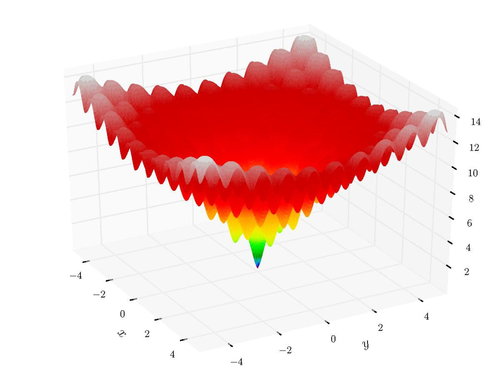

In [37]:
img = Image.open("Ackley's_function.jpg")
basewidth = 500
ratio = (basewidth / float(img.size[0]))
height = int((float(img.size[1]) * float(ratio)))
img = img.resize((basewidth, height), Image.ANTIALIAS)
img

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

#### 1. Strategy

In [38]:
strategy = ['best1bin', 'best1exp', 
              'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
              'best2exp', 'rand2exp', 'randtobest1bin', 
              'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
res = []
strategy_ = {}
for i in strategy:
    result = differential_evolution(ackley, 
                                bounds, 
                                strategy = i,
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)
    strategy_[i] = result.nit

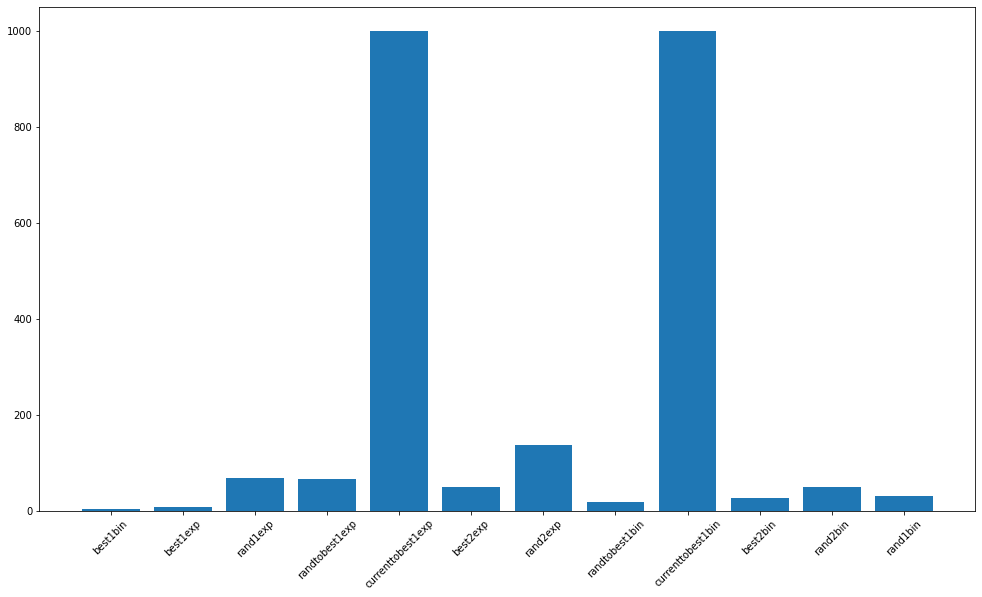

In [39]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(strategy,res)
plt.xticks(rotation=45)
plt.show()

In [40]:
min_strategy = min(strategy_.values())

key_strategy = " "

for key, velue in strategy_.items():
    if velue == min_strategy:
        key_strategy = key

#### 2. Population

In [41]:
population = range(1,30)
res = []
population_ = {}
for i in population:
    result = differential_evolution(ackley, 
                                bounds,
                                strategy = key_strategy,
                                popsize = i,
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)
    population_[i] = result.nit

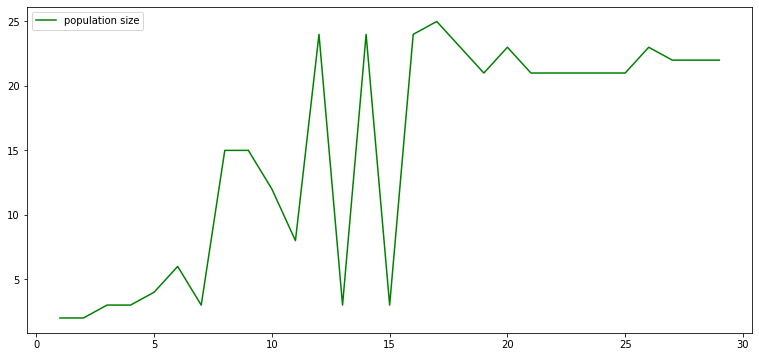

In [42]:
plt.plot(population,res, color="green", label='population size')
plt.legend(loc='upper left')
plt.show()

In [43]:
max_population = max(population_.values())

for key, velue in population_.items():
    if velue == max_population:
        print(key)

17


#### 3. Tolerance

In [44]:
tol = [x * 0.01 for x in range(1, 50)]
res = []
for i in tol:
    result = differential_evolution(ackley, 
                                bounds, 
                                strategy = key_strategy,
                                popsize = 15, 
                                tol=i, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

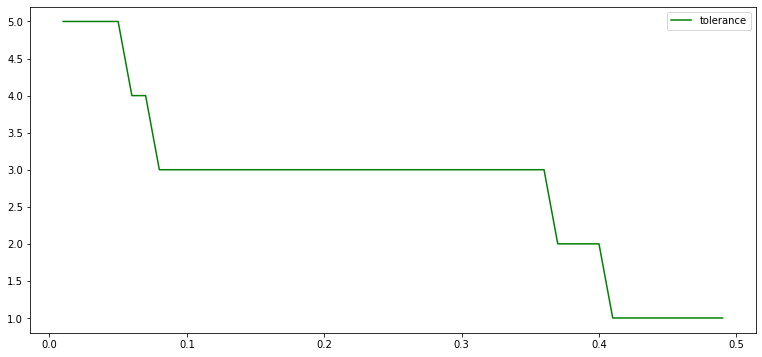

In [45]:
plt.plot(tol,res, color="green", label='tolerance')
plt.legend(loc='upper right')
plt.show()

#### 4. Mutation

In [46]:
mutation = [x * 0.01 for x in range(1, 20)]
res = []
for i in mutation:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=0.09, 
                                mutation=i, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

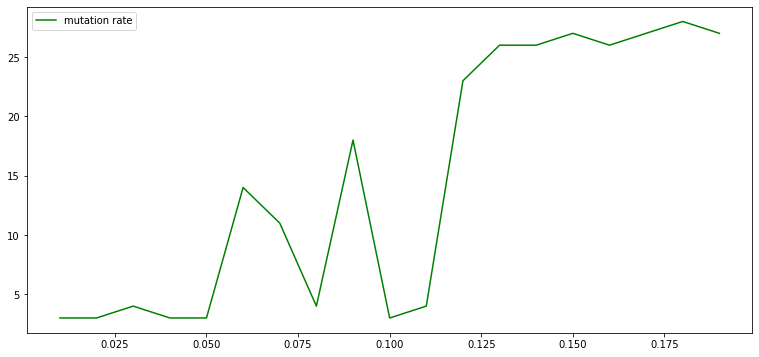

In [47]:
plt.plot(mutation,res, color="green", label='mutation rate')
plt.legend(loc='upper left')
plt.show()

#### 5. Recombination

In [48]:
recombination = [x * 0.05 for x in range(1, 21)]
res = []
for i in recombination:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=i, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

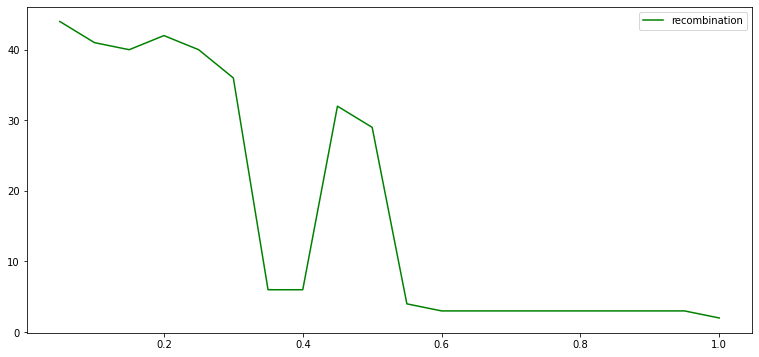

In [49]:
plt.plot(recombination,res, color="green", label='recombination')
plt.legend(loc='upper right')
plt.show()

#### 6. Updating

In [50]:
updating = ['immediate', 'deferred']
res = []
for i in updating:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating=i)
    res.append(result.nit)

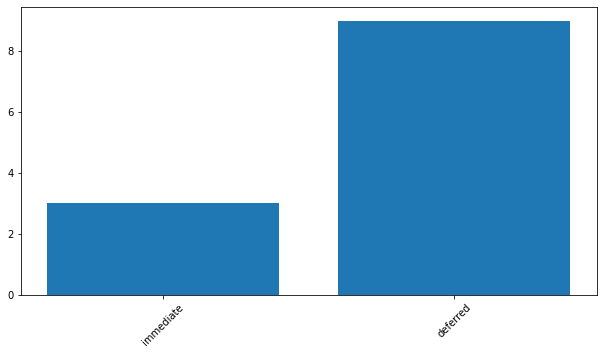

In [51]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(updating,res)
plt.xticks(rotation=45)
plt.show()

In [52]:
result = differential_evolution(ackley, 
                                bounds, 
                                strategy = key_strategy,
                                popsize = 15, 
                                tol=0.1, 
                                mutation=0.15, 
                                recombination=0.6, 
                                seed=42, 
                                updating='immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 963
     nit: 29
 success: True
       x: array([0., 0.])

Функция f(x,y) = 0 при значениях (x=0, y=0)  

#### Дополнительное задание

In [34]:
iteration = None

for i in range(500):
    strategy = random.choice(['best1bin', 'best1exp', 
              'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
              'best2exp', 'rand2exp', 'randtobest1bin', 
              'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin'])
    popsize = random.randint(13, 17)
    tol = random.uniform(0.05, 0.5)
    mutation = random.uniform(0.01, 0.11)
    recombination = random.random()
    
    result = differential_evolution(ackley, 
                                bounds,
                                strategy = strategy,
                                popsize = popsize, 
                                tol = tol, 
                                mutation = mutation,
                                recombination = recombination,
                                seed=42, 
                                updating='immediate')
    
    if iteration is None or result.nit < iteration:
        iteration = result.nit

In [35]:
print(strategy, popsize, tol, mutation, recombination)
print(iteration)

rand1exp 13 0.3294202753905461 0.02422129781418199 0.4048973662066935
1
